# Лабораторная работа 1.

## Группа: РИМ-111060

## Подгруппа задания (вариант): 3

### ФИО студентов:
#### Лисовский Кирилл Алексеевич
#### Никитенко Андрей Михайлович
#### Уксусников Николай Алексеевич
#### Савин Михаил Валерьевич
#### Степаненко Дмитрий Владимирович

## 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.


In [148]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import skew, kurtosis
import h5py
%matplotlib inline

## 2-3-4-5. Создать ВР, являющийся выборкой случайной величины с нормальным распределением; создать для него ряд временных отсчетов, на которых он будет определен; построить ВР на заданной временной сетке с помощью функций и отобразиться получившееся изображение ВР:

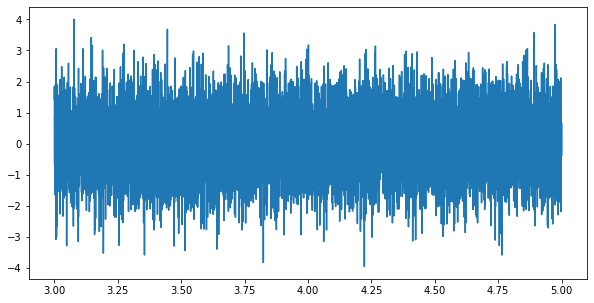

In [149]:
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5)) # здесь задается размер рисуемой области
plt.plot(t, X)
plt.show()

## 6. Найти мат. ожидание данного ВР двумя способами:

In [150]:
M = np.mean(X) # мат. ожидание с помощью внутренней функции
print('Мат. ожидание с помощью внутренней функции: ', M)

Мат. ожидание с помощью внутренней функции:  0.0028767011089723027


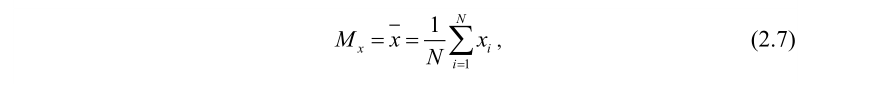

In [151]:
print('Мат. ожидание по формуле (2.7) из лекции 2: ', np.sum(X) / X.size) # Мат. ожидание по формуле 2.7

Мат. ожидание по формуле (2.7) из лекции 2:  0.0028767011089723027


### Сравнивая полученные результаты расчетов: они, как и должны быть, одинаковые

## 7. Найти дисперсию (variance) данного ВР двумя способами:

In [152]:
D = np.var(X) # Дисперсия с помощью внутренней функции
print('Дисперсия с помощью внутренней функции: ', D)

Дисперсия с помощью внутренней функции:  0.9989912568871563


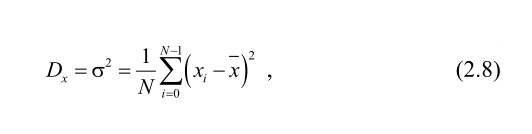

In [153]:
print('Дисперсия по определению: ', np.mean((X - np.mean(X))**2)) # Дисперсия по def
print('Дисперсия по формуле (2.8)  из лекции 2: ', np.sum((X - np.mean(X))**2) / X.size) # Дисперсия по формуле 2.8

Дисперсия по определению:  0.9989912568871563
Дисперсия по формуле (2.8)  из лекции 2:  0.9989912568871563


### Сравнивая полученные результаты расчетов: они, как и должны быть, одинаковые

## 8. Найти асимметрию ВР по формуле (2.9). Найти в Python функцию, которая считает ту же самую характеристику:

In [154]:
a = skew(X) # Ассиметрия ВР с помощью внутренней функции
print('Ассиметрия ВР с помощью внутренней функции: ', a)

Ассиметрия ВР с помощью внутренней функции:  0.008150960844049935


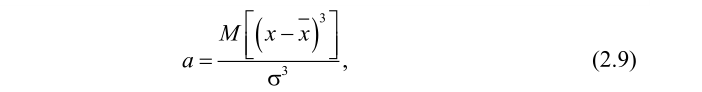

In [155]:
print('Дисперсия по формуле (2.9) из лекции 2: ', np.mean((X - np.mean(X))**3) / D**(3/2)) # Дисперсия по формуле 2.9
print(np.mean((X - np.mean(X))**3) / (np.std(X)**3))

Дисперсия по формуле (2.9) из лекции 2:  0.008150960844049938
0.008150960844049938


### Сравнивая полученные результаты расчетов: результаты одинаковые

## 9. Найти эксцесс ВР по формуле (2.10). Найти в Python функцию, которая считает ту же самую характеристику:

In [156]:
e = kurtosis(X, fisher=False) # Эксцесс ВР с помощью внутренней функции
print('Эксцесс ВР с помощью внутренней функции: ', e)

Эксцесс ВР с помощью внутренней функции:  3.109450482735823


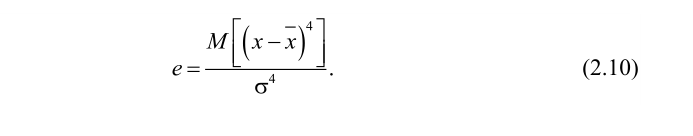

In [157]:
print('Эксцесс ВР с формуле (2.10)  из лекции 2: ' , np.mean((X - np.mean(X))**4) / (np.std(X)**4)) # Эксцесс ВР с формуле 2.10

Эксцесс ВР с формуле (2.10)  из лекции 2:  3.1094504827358227


### Сравнивая полученные результаты расчетов: результаты одинаковые

## 10. Построить оценку выборочной автокорреляции ВР несколькими способами (до 20 лага) и построить ее на графике:

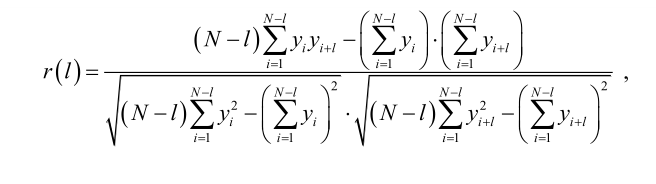

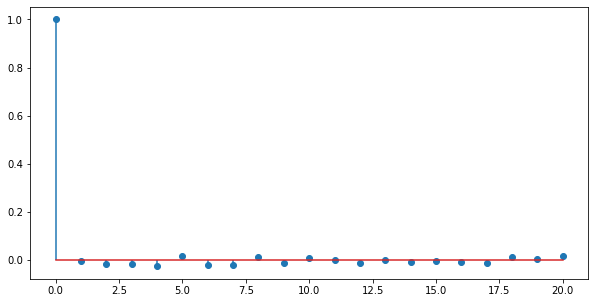

In [158]:
r = [1] # вычисление автокорреляции ВР по формуле (2.17) из лекции 2
for l in range(1,21):
    n = X.size - l
    y1=X[0:n]
    y2=X[l:X.size]
    a1=np.sum(y1)
    a2=np.sum(y2)
    a3=n*np.sum(y1*y2) - a1*a2
    b1=np.sqrt(n*np.sum(y1**2) - a1**2)
    b2=np.sqrt(n*np.sum(y2**2) - a2**2)
    r.append(a3 / (b1*b2))
    
plt.figure(figsize = (10,5))    
plt.stem(np.r_[0:21], np.array(r))
plt.show()

## 11. Написать полную функцию, которая имеет один входной параметр – это исходный временной ряд для анализа:

In [159]:
def f(x): # создаем функцию
    print('Мат. ожидание: ', np.mean(x))
    print('Дисперсия: ', np.var(x))
    print('Асимметрия ВР: ', skew(x))
    print('Эксцесс ВР: ', kurtosis(x, fisher=False))
    plot_acf(x, lags=20)
    plt.show

Мат. ожидание:  0.0028767011089723027
Дисперсия:  0.9989912568871563
Асимметрия ВР:  0.008150960844049935
Эксцесс ВР:  3.109450482735823


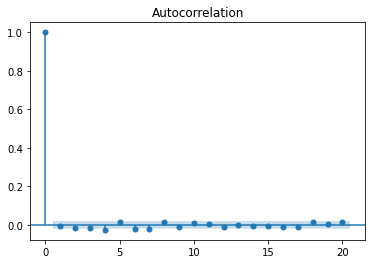

In [160]:
f(X)

### Сравнивая полученные результаты расчетов видим их логичное совпадение с предыдущими шагами вычислений

## 12-13. Работа с mat-файлами, вариант № 3:

In [161]:
Xmat=h5py.File('3.mat','r') # Вариант №3, загружаем mat-файл. 
Xmat=Xmat.get('z3')
Xmat=np.array(Xmat)
Xmat.ravel()

array([ 0.2       ,  0.03265472,  0.24824491,  0.2947592 ,  0.03307866,
        0.06226369,  0.06098353,  0.21258272,  0.31380686,  0.25367443,
        0.08168228, -0.15357648, -0.30396373,  0.12982641,  0.44008785,
        0.1865022 ,  0.04224099,  0.20078398, -0.27704771, -0.13514529,
       -0.44161725, -0.04653375, -0.0080852 ,  0.06360471, -0.06676479,
       -0.39423154,  0.08136421, -0.10680257,  0.00405135,  0.1922217 ,
        0.17275759, -0.11406875, -0.08631357, -0.0692014 ,  0.17829891,
        0.3118222 , -0.11953755, -0.23974888, -0.04564769, -0.01393507,
        0.03625832, -0.1996263 , -0.32893396, -0.11453599,  0.21396451,
        0.19132358,  0.03364029, -0.06682033, -0.24531055,  0.10717358,
        0.20391567,  0.02792827,  0.08626267,  0.08067269,  0.21050243,
        0.39282863, -0.23546041, -0.13232508, -0.05587388, -0.27308069,
       -0.14021326,  0.12118576, -0.11575431, -0.45657088, -0.34163203,
       -0.04476754, -0.16643098,  0.140326  , -0.0698971 ,  0.02

## 14-15. Используйте уже написанную функцию (пункт 11) от этого ВР для того, чтобы получить все его базовые характеристики; пояснить, с чем могут быть связаны особенности поведения или значений тех или иных характеристик:

In [162]:
def F(x_mat): # создаем функцию
    print('Мат. ожидание: ', np.mean(x_mat))
    print('Дисперсия: ', np.var(x_mat))
    print('Асимметрия ВР: ', skew(x_mat))
    print('Эксцесс ВР: ', kurtosis(x_mat, fisher=False))
    plot_acf(x_mat, lags=20)
    plt.show

Мат. ожидание:  0.011113303278100225
Дисперсия:  0.04626436657953686
Асимметрия ВР:  [-0.16796374]
Эксцесс ВР:  [2.8097508]


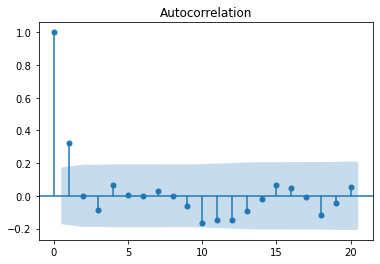

In [163]:
F(Xmat) # все вышеперечисленные действия для данных из mat-файла

### Таким образом, анализируя эти характеристики, с учетом всех вышеперечисленных свойств функции автокорреляции, можно выявлять структуру исследуемого ВР в соответствие с аддитивной моделью, то есть наличие в нем тренда, сезонных составляющих и периодических составляющих.

## Выводы по работе

В ходе выполнения данной лабораторной работы был построен ВР, вычислены МО, Д, асимметрия ВР и эксцесс ВР различными способами. Построена оценка выборочной автокорреляции ВР несколькими способами. По итогам работы дана обобщённая оценка полученным результатам с учётом возможностей популярных python-библиотек.